### Homework 1
#### 3180105843 汪奕晨


#### 三门问题

Monty Hall Problem：

参赛者会看见三扇关闭了的门，其中一扇的后面有一辆汽车，选中后面有车的那扇门可赢得该汽车，另外两扇门后面则各藏有一只山羊。
当参赛者选定了一扇门，但未去开启它的时候，节目主持人开启剩下两扇门的其中一扇，露出其中一只山羊。
主持人其后会问参赛者要不要换另一扇仍然关上的门。问题是：换另一扇门会否增加参赛者赢得汽车的机率。

如果严格按照上述的条件，即主持人清楚地知道，自己打开的那扇门后是羊，那么答案是会。
简单枚举即可得到：不换门的话，赢得汽车的几率是1/3。换门的话，赢得汽车的几率是2/3。

本文将自己设计程序，对这一问题进行模拟和统计检验。并给出可视化的结果；

#### 三门问题的模拟

In [1]:
# 引入需要的库
import pandas as pd  # 用于生成表格
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def init_gates(): # 初始化门的向量
    A = np.zeros(3)  # 三个0标记三个空(无奖)
    n = np.random.randint(3)  # 随机产生一个大奖
    A[n] = 1  # 标记1为大奖
    return A

def one_sim():  # 进行一次模拟
    G = init_gates() # 三扇门
    award = np.argwhere(G == 1)[0][0]  # 奖所在的门编号 0/1/2
    c = np.random.randint(3) # 随机选择的门
    if c == award:
        a = [0,1,2]
        a.remove(c)
        d = a[np.random.randint(2)] # 主持人删除的门
    else:
        d = 3 - c - award
    # 选择换的策略
    f = 3 - c - d  # 技巧 由于0 1 2 中的两个已知  可以这样得到第三个编号
    if f == award:
        return True
    else:
        return False

def batch_sim(N): # N为Batch_Size，进行一批模拟
    lst = [one_sim() for i in range(N)]
    win_rate = np.mean(lst)
    return win_rate

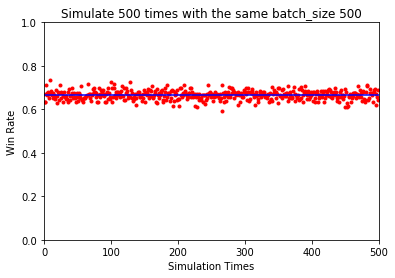

In [6]:
path = './wk1/'
# 多次进行批模拟的散点图， 不改变batch_size
batch_size = 500  # 每批重复测试的次数
sim_size = 500   # 以批为单位模拟的组数
x = np.arange(sim_size)
y = [batch_sim(batch_size) for i in x]

plt.plot(x,y,'r.')
plt.plot([0, sim_size], [2/3, 2/3], 'b-')
plt.title('Simulate {0:d} times with the same batch_size {1:d}'.format(sim_size, batch_size))
plt.xlabel('Simulation Times')
plt.ylabel('Win Rate')
plt.axis([0, sim_size, 0, 1])
plt.savefig(path +'fig3.jpg')
plt.show()

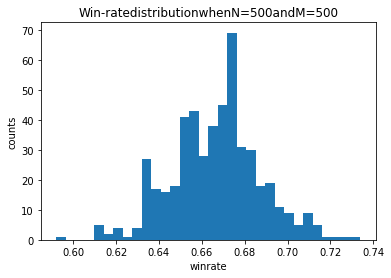

In [7]:
plt.hist(y, bins = 32)
plt.title('Win-ratedistributionwhenN={0:}andM={1:}'.format(batch_size ,sim_size))
plt.xlabel('winrate')
plt.savefig(path +'fig1.jpg')
plt.ylabel('counts')
plt.show()

In [8]:
print(np.mean(y))
print(np.var(y))
print(stats.shapiro(y))

0.6664680000000001
0.00043135697599999966
(0.995313823223114, 0.13695956766605377)


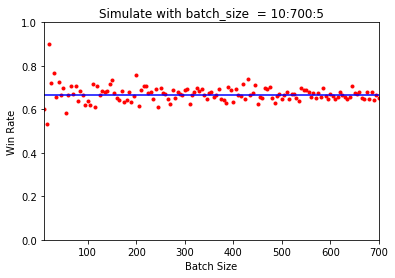

In [4]:
# 多次进行批模拟 改变batch_size
begin_batch_size = 10  # 起始batch_size
batch_step = 5 # 步进的batch_size
end_batch_size = 700 #  最终的batch_size

x = np.arange(begin_batch_size, end_batch_size + batch_step, batch_step)  # batch_size
y = [batch_sim(i) for i in x]

plt.plot(x,y,'r.')
plt.plot([begin_batch_size, end_batch_size], [2/3, 2/3], 'b-')
plt.title('Simulate with batch_size  = {0:d}:{1:d}:{2:d}'.format(begin_batch_size, end_batch_size, batch_step))
plt.xlabel('Batch Size')
plt.ylabel('Win Rate')
plt.axis([begin_batch_size, end_batch_size, 0, 1])
plt.savefig(path +'fig2.jpg')
plt.show()